In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
file_path = '/content/drive/My Drive/dataset/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
df = pd.read_csv(file_path)
print(df.shape)
print(df.dtypes)
df.head()

(52203, 10)
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [48]:
df[['low', 'high']] = df['storey_range'].str.split(' TO ', expand=True)
df['storey']=(df['low'].astype(int)+df['high'].astype('int'))/2
df['month'] =df['month'].str[:4].astype(int)
#df['resale_price'] = df['resale_price']/100000
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,low,high,storey
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,2.50,06,10,8.0
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,2.65,01,05,3.0
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,3.15,06,10,8.0
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,3.20,01,05,3.0
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,3.21,06,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,2014,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,5.80,10,12,11.0
52199,2014,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,5.40,10,12,11.0
52200,2014,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,7.38,07,09,8.0
52201,2014,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,5.92,07,09,8.0


array([[1.        , 0.74144168],
       [0.74144168, 1.        ]])

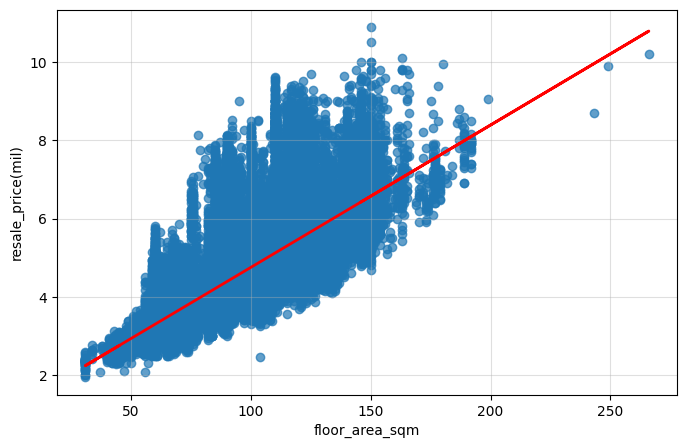

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x = df['floor_area_sqm']
y = df['resale_price']

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7)

# ---- Add Trendline ----
m, b = np.polyfit(x, y, 1)      # slope (m) and intercept (b)
plt.plot(x, m*x + b, color='red', linewidth=2)
plt.xlabel('floor_area_sqm')
plt.ylabel('resale_price(mil)')
plt.grid(True, linestyle='-', alpha=0.4)
np.corrcoef(x, y)


array([[1.        , 0.30550372],
       [0.30550372, 1.        ]])

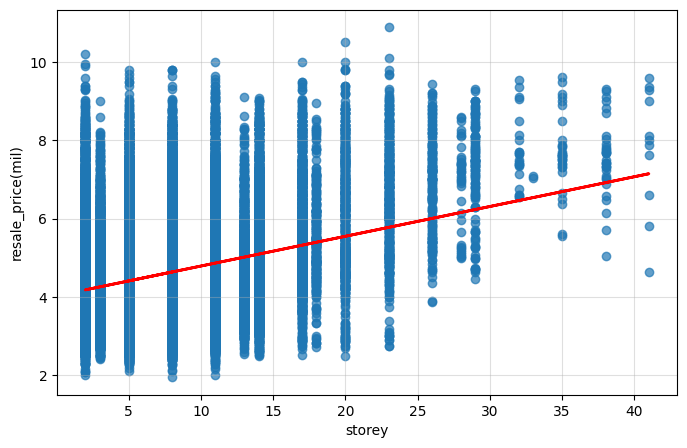

In [45]:
x = df['storey']
y = df['resale_price']

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7)

# ---- Add Trendline ----
m, b = np.polyfit(x, y, 1)      # slope (m) and intercept (b)
plt.plot(x, m*x + b, color='red', linewidth=2)
plt.xlabel('storey')
plt.ylabel('resale_price(mil)')
plt.grid(True, linestyle='-', alpha=0.4)
np.corrcoef(x, y)

array([[1.        , 0.43578289],
       [0.43578289, 1.        ]])

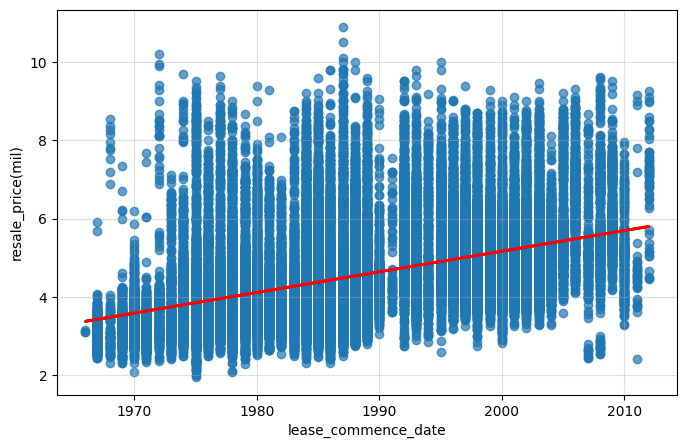

In [50]:
x = df['lease_commence_date']
y = df['resale_price']

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7)

# ---- Add Trendline ----
m, b = np.polyfit(x, y, 1)      # slope (m) and intercept (b)
plt.plot(x, m*x + b, color='red', linewidth=2)
plt.xlabel('lease_commence_date')
plt.ylabel('resale_price(mil)')
plt.grid(True, linestyle='-', alpha=0.4)
np.corrcoef(x, y)

In [ ]:
# Dictionary mapping towns to directions
sg_location_direction = {
    'Bedok': 'East',
    'Tampines': 'East',
    'Pasir Ris': 'East',
    'Changi': 'East',
    'Jurong East': 'West',
    'Jurong West': 'West',
    'Clementi': 'West',
    'Bukit Timah': 'Central',
    'Orchard': 'Central',
    'Newton': 'Central',
    'Woodlands': 'North',
    'Sembawang': 'North',
    'Yishun': 'North',
    'Hougang': 'North-East',
    'Punggol': 'North-East',
    'Serangoon': 'North-East',
    'Queenstown': 'South-West',
    'Sentosa': 'South',
    'Pasir Panjang': 'South-West',
    # Add more towns as needed
}
